In [3]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float32, device=torch.device("cpu")),
    dataset_name="fnlvqr_glasses",
    dataset_number_of_points=10**6,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="amortized_neural_quantile_regression",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=1,
        hidden_dimension=64,
        number_of_hidden_layers=8,
        activation_function_name="Softplus",
        network_type="PISCNN",
        potential_to_estimate_with_neural_network="u"
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=100,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
_ = model.eval()

Epoch: 10, Potential Objective: 0.786, Amortization Objective: 0.497, LR: 0.000000: 100%|██████████| 10/10 [1:29:21<00:00, 536.20s/it]


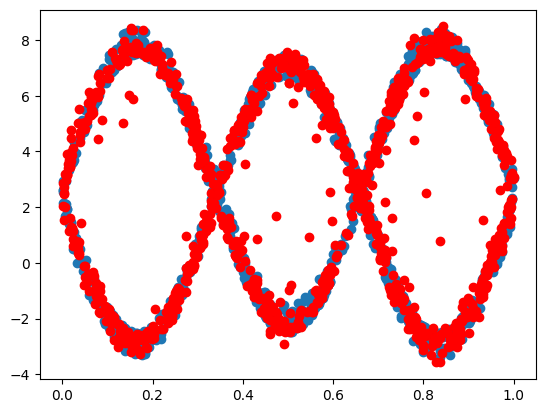

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# from utils.plot import plot_quantile_levels_from_dataset
from datasets import PICNN_FNLVQR_Glasses
from datasets import FNLVQR_Glasses

dataset = FNLVQR_Glasses(tensor_parameters=experiment.tensor_parameters)
X, Y = dataset.sample_joint(n_points=1000)

convex_approximation_dataset = PICNN_FNLVQR_Glasses(tensor_parameters=experiment.tensor_parameters)
X_convex, Y_convex = convex_approximation_dataset.sample_joint(n_points=1000)


plt.scatter(X, Y)
plt.scatter(X_convex, Y_convex,)
plt.show()